In [1]:
import sys
sys.path.append('/Applications/Stata/utilities')
from pystata import config
config.init('se')

[0.072s][warning][os,thread] Attempt to protect stack guard pages failed (0x000000016bda0000-0x000000016bdac000).
[0.072s][warning][os,thread] Attempt to deallocate stack guard pages failed.

  ___  ____  ____  ____  ____ ©
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user network, expiring 21 Sep 2023
Serial number: 401709301720
  Licensed to: Dhruv Akshay Pandit
               ISEG

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000; see help set_maxvar.


In [7]:
%%stata
use /Users/dhruvpandit/Documents/GitHub/ISEG_AEF/Econometrics/Micro2/Data/health.dta

In [8]:
%%stata
describe


Contains data from /Users/dhruvpandit/Documents/GitHub/ISEG_AEF/Econometrics/Mi
> cro2/Data/health.dta
 Observations:        20,186                  
    Variables:            13                  23 Apr 2014 10:29
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
coins           float   %9.0g                 coinsurance -- medical
year            float   %9.0g                 study year
id              float   %9.0g                 person id, leading digit is sit
age             float   %9.0g                 age that year
female          float   %9.0g                 =1 if female
med             float   %9.0g                 medical expenditures (dollars)
mdu             float   %9.0g                 number face-to-fact md visits
num             float   %9.0g                 f

In [9]:
%%stata
summarize med


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         med |     20,186    171.5892    698.2689          0   39182.02


In [10]:
%%stata
summarize med if med>0


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         med |     15,733    220.1551    784.1543   .4276146   39182.02


(bin=43, start=0, width=911.20967)


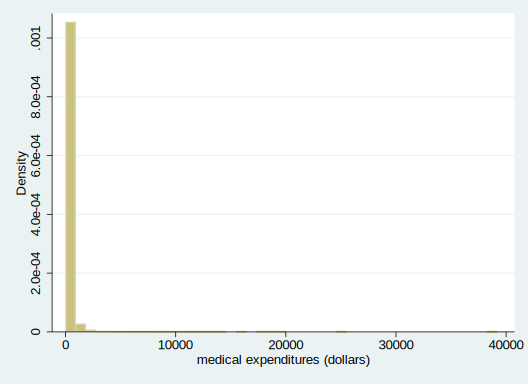

In [11]:
%%stata
histogram med

In [14]:
%%stata
tab female


      =1 if |
     female |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      9,751       48.31       48.31
          1 |     10,435       51.69      100.00
------------+-----------------------------------
      Total |     20,186      100.00


## Using Only Observations from Year 1

In [15]:
%%stata
drop if year != 1

(14,548 observations deleted)


## Exponential Based on Poisson

In [17]:
%%stata
poisson med lcoins ndisease female age lfam child, robust
estimates store poisson


. poisson med lcoins ndisease female age lfam child, robust
note: you are responsible for interpretation of noncount dep. variable.

Iteration 0:   log pseudolikelihood =   -1254123  
Iteration 1:   log pseudolikelihood = -1254047.6  
Iteration 2:   log pseudolikelihood = -1254047.5  

Poisson regression                                      Number of obs =  5,638
                                                        Wald chi2(6)  = 109.42
                                                        Prob > chi2   = 0.0000
Log pseudolikelihood = -1254047.5                       Pseudo R2     = 0.0838

------------------------------------------------------------------------------
             |               Robust
         med | Coefficient  std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
      lcoins |  -.0478877   .0245805    -1.95   0.051    -.0960646    .0002892
    ndisease |   .0281757   .0060746     4.

In [19]:
%%stata
poisson med lcoins ndisease female age lfam child if med>0, robust
estimates store poisson0


. poisson med lcoins ndisease female age lfam child if med>0, robust
note: you are responsible for interpretation of noncount dep. variable.

Iteration 0:   log pseudolikelihood = -1087520.2  
Iteration 1:   log pseudolikelihood = -1087511.2  
Iteration 2:   log pseudolikelihood = -1087511.2  

Poisson regression                                      Number of obs =  4,451
                                                        Wald chi2(6)  =  66.48
                                                        Prob > chi2   = 0.0000
Log pseudolikelihood = -1087511.2                       Pseudo R2     = 0.0657

------------------------------------------------------------------------------
             |               Robust
         med | Coefficient  std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
      lcoins |  -.0200287   .0246889    -0.81   0.417     -.068418    .0283606
    ndisease |   .0210867   .00627

In [20]:
%%stata
gen lmed=log(med)
regress lmed lcoins ndisease female age lfam child if med>0, robust
estimates store log0


. gen lmed=log(med)
(1,187 missing values generated)

. regress lmed lcoins ndisease female age lfam child if med>0, robust

Linear regression                               Number of obs     =      4,451
                                                F(6, 4444)        =     106.73
                                                Prob > F          =     0.0000
                                                R-squared         =     0.1226
                                                Root MSE          =     1.3519

------------------------------------------------------------------------------
             |               Robust
        lmed | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      lcoins |   -.054901   .0099633    -5.51   0.000    -.0744341   -.0353679
    ndisease |    .030717   .0030927     9.93   0.000     .0246537    .0367803
      female |   .1199091   .0417646     2.87  

In [21]:
%%stata
gen lmed1=log(med+1)
regress lmed1 lcoins ndisease female age lfam child, robust
estimates store log1


. gen lmed1=log(med+1)

. regress lmed1 lcoins ndisease female age lfam child, robust

Linear regression                               Number of obs     =      5,638
                                                F(6, 5631)        =     148.62
                                                Prob > F          =     0.0000
                                                R-squared         =     0.1262
                                                Root MSE          =      1.953

------------------------------------------------------------------------------
             |               Robust
       lmed1 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      lcoins |  -.1485372   .0126915   -11.70   0.000    -.1734174   -.1236569
    ndisease |   .0584591   .0039132    14.94   0.000     .0507878    .0661304
      female |   .3064252   .0535977     5.72   0.000      .201353    .4114974
      

In [22]:
%%stata
estimates table poisson poisson0, b star(0.1 0.05 0.01)


----------------------------------------------
    Variable |    poisson        poisson0     
-------------+--------------------------------
      lcoins | -.04788772*      -.0200287     
    ndisease |  .02817566***    .02108674***  
      female |  .22631112*      .14747037     
         age |  .00978456***    .00878032**   
        lfam | -.09287836      -.08235938     
       child | -.41122852*      -.3678983     
       _cons |  4.6311773***    4.9182498***  
----------------------------------------------
           Legend: * p<.1; ** p<.05; *** p<.01


In [23]:
%%stata
estimates table log0 log1, b star(0.1 0.05 0.01)


----------------------------------------------
    Variable |     log0            log1       
-------------+--------------------------------
      lcoins | -.05490096***   -.14853716***  
    ndisease |  .03071698***     .0584591***  
      female |  .11990912***     .3064252***  
         age |  .00728165***    .00895117***  
        lfam | -.13577591***   -.18069853***  
       child |  -.4972463***   -.47592639***  
       _cons |  3.9544865***    3.0004653***  
----------------------------------------------
           Legend: * p<.1; ** p<.05; *** p<.01


In [24]:
%%stata
summarize mdu


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         mdu |      5,638    2.877971    4.332918          0         69


In [25]:
%%stata
tabulate mdu


     number |
face-to-fac |
t md visits |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      1,729       30.67       30.67
          1 |      1,047       18.57       49.24
          2 |        814       14.44       63.68
          3 |        511        9.06       72.74
          4 |        385        6.83       79.57
          5 |        271        4.81       84.37
          6 |        188        3.33       87.71
          7 |        156        2.77       90.48
          8 |        134        2.38       92.85
          9 |         80        1.42       94.27
         10 |         56        0.99       95.26
         11 |         56        0.99       96.26
         12 |         32        0.57       96.83
         13 |         33        0.59       97.41
         14 |         21        0.37       97.78
         15 |         23        0.41       98.19
         16 |         12        0.21       98.40
         17 |          7        0.12    

In [28]:
%%stata
poisson mdu lcoins ndisease female age lfam child
estimates store cpoissonml


. poisson mdu lcoins ndisease female age lfam child

Iteration 0:   log likelihood = -17173.414  
Iteration 1:   log likelihood = -17173.058  
Iteration 2:   log likelihood = -17173.058  

Poisson regression                                     Number of obs =   5,638
                                                       LR chi2(6)    = 2296.50
                                                       Prob > chi2   =  0.0000
Log likelihood = -17173.058                            Pseudo R2     =  0.0627

------------------------------------------------------------------------------
         mdu | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
      lcoins |  -.0682563   .0038214   -17.86   0.000    -.0757462   -.0607665
    ndisease |     .03538   .0010286    34.40   0.000     .0333639     .037396
      female |   .1276798   .0164078     7.78   0.000     .0955211    .1598386
         age |   .0

(bin=37, start=0, width=1.8648649)


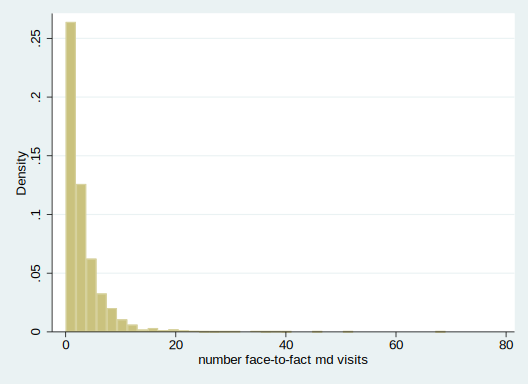

In [27]:
%%stata
histogram mdu

In [29]:
%%stata
poisson mdu lcoins ndisease female age lfam child, robust
estimates store cpoissonqml


. poisson mdu lcoins ndisease female age lfam child, robust

Iteration 0:   log pseudolikelihood = -17173.414  
Iteration 1:   log pseudolikelihood = -17173.058  
Iteration 2:   log pseudolikelihood = -17173.058  

Poisson regression                                      Number of obs =  5,638
                                                        Wald chi2(6)  = 388.20
                                                        Prob > chi2   = 0.0000
Log pseudolikelihood = -17173.058                       Pseudo R2     = 0.0627

------------------------------------------------------------------------------
             |               Robust
         mdu | Coefficient  std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
      lcoins |  -.0682563   .0094538    -7.22   0.000    -.0867854   -.0497273
    ndisease |     .03538    .002696    13.12   0.000     .0300959    .0406641
      female |   .1276798     .04043

In [30]:
%%stata
nbreg mdu lcoins ndisease female age lfam child, dispersion(constant)


Fitting Poisson model:

Iteration 0:   log likelihood = -17173.414  
Iteration 1:   log likelihood = -17173.058  
Iteration 2:   log likelihood = -17173.058  

Fitting constant-only model:

Iteration 0:   log likelihood = -13655.951  
Iteration 1:   log likelihood = -12393.164  
Iteration 2:   log likelihood = -12392.553  
Iteration 3:   log likelihood = -12392.553  

Fitting full model:

Iteration 0:   log likelihood = -12392.553  
Iteration 1:   log likelihood = -12217.197  
Iteration 2:   log likelihood = -12128.774  
Iteration 3:   log likelihood = -12128.041  
Iteration 4:   log likelihood = -12128.041  

Negative binomial regression                            Number of obs =  5,638
                                                        LR chi2(6)    = 529.02
Dispersion: constant                                    Prob > chi2   = 0.0000
Log likelihood = -12128.041                             Pseudo R2     = 0.0213

----------------------------------------------------------------

In [31]:
%%stata
estimates store cnegbin1